# ML Exercise 2 - Logistic Regression for Classification




<font color='red'> PLEASE DO NOT HESITATE to include your remarks/comments (in colors of your choice) in the notebook. That will be considered as a short report.</font>

## Part 1: Logistic regression for Classification





# Important notes for implementation in Numpy

 For array, * means element-wise multiplication, and the dot() function is used for matrix multiplication.


 For matrix, * means matrix multiplication, and the multiply() function is used for element-wise multiplication.

You will build a logistic regression model to predict whether a student gets admitted to a university. 

You want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants. You're going to build a classification model that estimates the probability of admission based on the exam scores.

Let's start by examining the data.

In [18]:
# TODO: change the correct path, you may need to create a "data" folder in your drive
!wget https://www.dropbox.com/s/pbsoazcktmpv1g2/ex2data1.txt?dl=0 \
   -O ex2data1.txt

--2020-02-09 10:32:39--  https://www.dropbox.com/s/pbsoazcktmpv1g2/ex2data1.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pbsoazcktmpv1g2/ex2data1.txt [following]
--2020-02-09 10:32:40--  https://www.dropbox.com/s/raw/pbsoazcktmpv1g2/ex2data1.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0a223d545b392a9de57c8d05d6.dl.dropboxusercontent.com/cd/0/inline/AxyB-BU0ljJNWQWu-OJsWZnXN5I21jjZH1p57fPrpB6za-0POzuqi4Vc47iqzaCU0XUqY7bAbZ-yKmfSJ0XN0PE-eFBfPmMXemBuTigugNPEig/file# [following]
--2020-02-09 10:32:41--  https://uc0a223d545b392a9de57c8d05d6.dl.dropboxusercontent.com/cd/0/inline/AxyB-BU0ljJNWQWu-OJsWZnXN5I21jjZH1p57fPrpB6za-0POzuqi4Vc47iqzaCU0XUqY7bAbZ-yKmfSJ0XN0PE-eFBfPmMXemBuTigugNPEig/file
Resolving uc0a

In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

Create a scatter plot of the two scores and use color coding to visualize if the example is positive (admitted) or negative (not admitted).

Text(0, 0.5, 'Exam 2 Score')

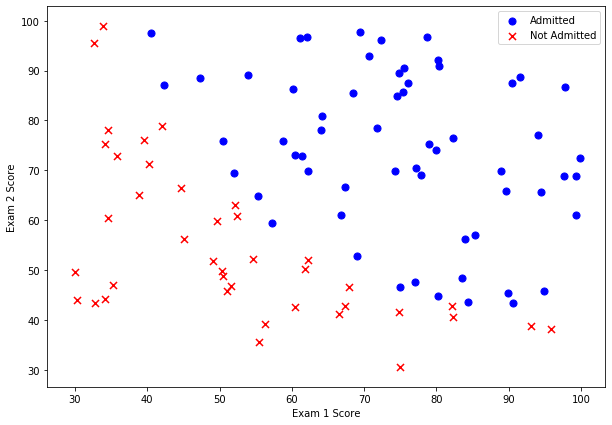

In [20]:
##TODO: to complete

positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])] #COMPLETE YOUR CODE HERE For not Admitted .isin([0])]

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

<font color='red'> You implement logistic regression so we can train a model to predict the outcome.</font> .

Recall the that the logistic regression hypothesis is defined as: 

$y(x,\mathbf{w})=\sigma(\mathbf{w}^Tx)$ \\

where $\sigma$ is a sigmoid function: 

$\sigma(z)=\displaystyle \frac{1}{1+e^{-z}} $


**Cost function and gradient**
The cost function in logistic regression is:

$E(\mathbf{w})=\displaystyle \frac{1}{N} \sum_{n=1}^{N} \{-t_n ln (y(x_n,\mathbf{w}))-(1-t_n) ln (1-y(x_n,\mathbf{w}))\} $ \\

and the gradient of the cost is a vector of the same length as $\mathbf{w}$ where the $j$th element is defined as follows: 

$\displaystyle \frac{\nabla E(w_j)}{\nabla w_j} = \frac{1}{N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}x_n^{(j)}$

($x_n^{(j)}$: the $j$th element of the input $x_n$)

While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $y(x,\mathbf{w})$.

<font color='red'>Question 1: Explain the difference? </font>

<font color='red'>Question 2: Prove the equation of gradient computation. Write it in paper and give it to the teacher</font>

<font color='red'>TODO: first you need to create a sigmoid function. </font>

In [0]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) #COMPLETE YOUR CODE HERE

Let's do a quick sanity check to make sure the function is working.

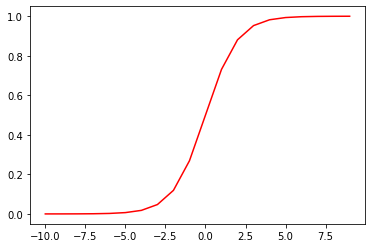

In [22]:
nums = np.arange(-10, 10, step= 1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

<font color='red'> TODO: Do some setup, similar to what we did in exercise 1 for linear regression.</font>

In [0]:

# set X (training data) and t (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
# add a ones column - this makes the matrix multiplication work out easier
X.insert(0,'Ones',1)

t = data.iloc[:,cols-1:cols] #COMPLETE YOUR CODE HERE

# convert to numpy arrays and initalize the parameter array w
X = np.array(X.values)
t = np.array(t.values)           #COMPLETE YOUR CODE HERE
w = np.zeros(cols) #COMPLETE YOUR CODE HERE, what is the shape of w


Let's quickly check the shape of our arrays to make sure everything looks good.

In [24]:
X.shape, w.shape, t.shape

((100, 3), (3,), (100, 1))

#<font color='red'> TODO: Now you need to write the cost function to evaluate a solution.</font>

In [0]:
def cost(w, X, t):
    ### use np.matrix
    #print(len(X))
    #COMPLETE YOUR CODE HERE.
    N = X.shape[0]

    X = np.matrix(X)
    w = np.matrix(w)
    t = np.matrix(t)

    y = sigmoid(np.dot(X,w.T))
    lny = np.log(y)
    ln1y = np.log(1-y)

    E = np.sum(-np.multiply(t,lny)-np.multiply((1-t),ln1y))/N

    return E

Now let's compute the cost for our initial solution (0 values for w).

In [26]:
cost(w, X, t)

0.6931471805599453

Expected result 0.6931471805599453.


Next you need a function to compute the gradient (parameter updates) given the training data, labels, and some parameters w.

In [0]:
def gradient(w, X, t):
    ## use np.matrix
    nParas = w.shape[0]
    grad = np.zeros(nParas)
    w = np.matrix(w)
    X = np.matrix(X)
    t = np.matrix(t)
    N = X.shape[0]

    #COMPLETE YOUR CODE HERE.
    y = sigmoid(np.dot(X,w.T))
    diff = y-t
    for i in range(nParas):
      grad[i] = np.sum(np.multiply(diff,X[:,i]))/N
    return grad

Note that you don't actually perform gradient descent in this function - you just compute a single gradient step. You will use SciPy's "optimize" namespace to optimize the parameters given functions to compute the cost and the gradients.

Let's look at a single call to the gradient method using our data and initial paramter values of 0.

In [28]:
gradient(w, X, t)

array([ -0.1       , -12.00921659, -11.26284221])

Expected result: array([ -0.1       , -12.00921659, -11.26284221]).

Now you can use SciPy's truncated newton implementation to find the optimal parameters. Call function fmin_tnc.

In [29]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=w, fprime=gradient, args=(X, t))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

Let's see what the our cost looks like with this solution.

In [30]:
cost(result[0], X, t)

0.20349770158947458

![alt text](https://)Expected result: 0.20349770158947458.


<font color='red'> Write a function that will output predictions for a dataset X using our learned parameters w. </font> You can then use this function to score the training accuracy of our classifier. 

<font color='red'> Question: what is the threshold choosen? why? </font>
<font color='green'> On sait que $y(x_n,w)$ représente la probabilité que l'élève soit admis. Ainsi, il suffit de mettre un seuil afin de distinguer les deux classes. On choisit un seuil de 0,5.</font>

In [0]:
#TODO
def predict(w, X):
    
    #COMPLETE YOUR CODE HERE
    y = sigmoid(np.dot(X,w.T))

    #Compute the probablity score
    probability = y   #COMPLETE YOUR CODE HERE
    #set a threshold for classification score
    threshold = 0.5    #COMPLETE YOUR CODE HERE
    return [1 if x >= threshold else 0 for x in probability]

In [53]:
w_min = np.matrix(result[0])
predictions = predict(w_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, t)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


Our logistic regression classifer correctly predicted if a student was admitted or not 89% of the time.  

#<font color='red'> Question: which dataset did you use ? </font> (training or validation or test set?)


#<font color='red'> Question: is it OK for using that dataset for performance evaluation? why? </font> 


## Part 2: Regularized logistic regression

Regularization is a term in the cost function that causes the algorithm to prefer "simpler" models (in this case, models will have smaller coefficients). 

You are the product manager of the factory and you have the test results for a product on two different tests.  From these two scores, you would like to determine whether the product should be accepted or rejected.

Similar to part 1, let's start by visualizing the data.

In [54]:
# TODO: change the correct path, you may need to create a "data" folder in your drive
!wget https://www.dropbox.com/s/s3gzesd2ntwwxwb/ex2data2.txt?dl=0 \
   -O ex2data2.txt

--2020-02-09 10:46:22--  https://www.dropbox.com/s/s3gzesd2ntwwxwb/ex2data2.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s3gzesd2ntwwxwb/ex2data2.txt [following]
--2020-02-09 10:46:22--  https://www.dropbox.com/s/raw/s3gzesd2ntwwxwb/ex2data2.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ebbdbbe068d39157a857339fa.dl.dropboxusercontent.com/cd/0/inline/AxxVe3rxb5fxtBpQLFiHr7faq3vt2fRsZRI9319vGxlXc7NiUue17Z2Uw_gABOtiarQDh9GW51DhBAr8mnY1pWIT4dbtUt4mXEOLIpL_EiyDJg/file# [following]
--2020-02-09 10:46:22--  https://uc3ebbdbbe068d39157a857339fa.dl.dropboxusercontent.com/cd/0/inline/AxxVe3rxb5fxtBpQLFiHr7faq3vt2fRsZRI9319vGxlXc7NiUue17Z2Uw_gABOtiarQDh9GW51DhBAr8mnY1pWIT4dbtUt4mXEOLIpL_EiyDJg/file
Resolving uc3e

In [55]:
data2 = pd.read_csv('ex2data2.txt', header=None, names=['Score 1', 'Score 2', 'Accepted'])
data2.head()

Score 1  Score 2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1

Text(0, 0.5, 'Score 2')

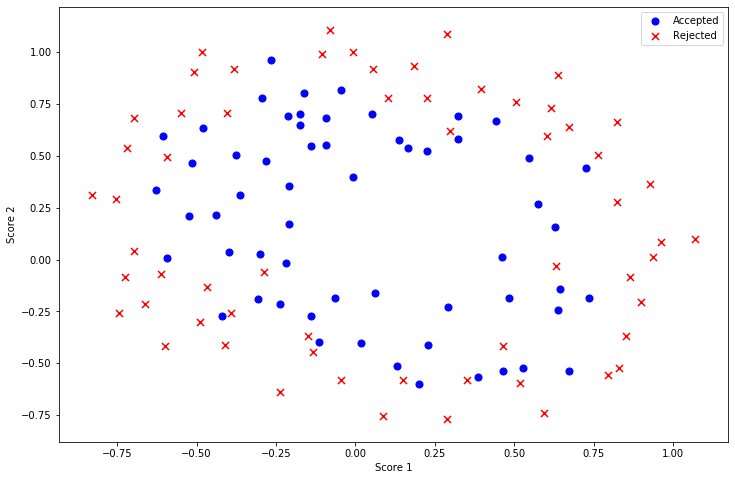

In [56]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])] #COMPLETE YOUR CODE HERE.  for negative

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Score 1'], positive['Score 2'], s=50, c='b', marker='o', label='Accepted') #for positive
ax.scatter(negative['Score 1'], negative['Score 2'], s=50, c='r', marker='x', label='Rejected') #COMPLETE YOUR CODE HERE.  for negative
ax.legend()
ax.set_xlabel('Score 1')
ax.set_ylabel('Score 2')

This data looks a bit more complicated than the previous example.  In particular, you'll notice that there is no linear decision boundary that will perform well on this data. <font color='blue'> One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. </font> Let's start by creating a bunch of polynomial features.

In [57]:
 
#COMPLETE YOUR CODE HERE, choose a value (4,5,6,..) which determines how many new features will be generated

degree = 5
x1 = data2['Score 1']
x2 = data2['Score 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Score 1', axis=1, inplace=True)
data2.drop('Score 2', axis=1, inplace=True)

data2.head()

Accepted  Ones       F10       F20  ...       F40       F41       F42       F43
0         1     1  0.051267  0.002628  ...  0.000007  0.000094  0.001286  0.017551
1         1     1 -0.092742  0.008601  ...  0.000074 -0.000546  0.004035 -0.029801
2         1     1 -0.213710  0.045672  ...  0.002086 -0.006757  0.021886 -0.070895
3         1     1 -0.375000  0.140625  ...  0.019775 -0.026483  0.035465 -0.047494
4         1     1 -0.513250  0.263426  ...  0.069393 -0.062956  0.057116 -0.051818

[5 rows x 12 columns]

<font color='red'> TODO: what can you say about the generated features?  
  
 Now we need to modify the cost and gradient functions from part 1 to include the regularization term.  First the cost function.
  
 </font>

The regularized cost function in logistic regression is:

$E(\mathbf{w})=\displaystyle \frac{1}{N} \sum_{n=1}^{N} \{-t_n ln (y(x_n,\mathbf{w}))-(1-t_n) ln (1-y(x_n,\mathbf{w}))\}  +\frac {\lambda} {2}  \sum_{i=1}^{k}w_i^2$ \\

We do not regularize the parameter $w_0$. $\lambda$ is a hyperparameter that controls the effectiveness of the regularization term.

The gradient is:


$\displaystyle \frac{\nabla E(\mathbf{w})}{\nabla w_0} = \frac{1}{N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}x_n^{(j)}$ for $j=0$


$\displaystyle \frac{\nabla E(\mathbf{w})}{\nabla w_j} = \frac{1}{N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}x_n^{(j)} + \frac{\lambda}{N}w_j$ for $j\geq 1$





In [0]:
def costReg(w, X, t, lambd):
    w = np.matrix(w)
    X = np.matrix(X)
    t = np.matrix(t)
    #COMPLETE YOUR CODE HERE.
    
    N = X.shape[0]
    y = sigmoid(np.dot(X,w.T))

    E = lambd*np.sum(np.square(w))/2+cost(w,X,t)

    return E

Notice the "reg" term in the equation. Now we need to add regularization to the gradient function:

In [0]:
def gradientReg(w, X, t, lambd):
    #COMPLETE YOUR CODE HERE.
    
    nParas = w.shape[0]
    grad = np.zeros(nParas)
    w = np.matrix(w)
    X = np.matrix(X)
    t = np.matrix(t)
    N = X.shape[0]

    #COMPLETE YOUR CODE HERE.
    y = sigmoid(np.dot(X,w.T))
    diff = y-t
    grad[0] = np.sum(np.multiply(diff,X[:,0]))/N
    for i in range(nParas):
      grad[i] = (np.sum(np.multiply(diff,X[:,i]))+lambd*w[0,i])/N 
    return grad

Initialize variables like we did in part 1.

In [0]:
# set X and t (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
t2 = data2.iloc[:,0:1]    #COMPLETE YOUR CODE HERE.

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
t2 = np.array(t2.values)    #COMPLETE YOUR CODE HERE
w2 = np.zeros(cols-1)    #COMPLETE YOUR CODE HERE, Question: How many parameters do you have to find?

Let's initialize our learning rate to a sensible value.  We can play with this later if necessary (i.e. if the penalization is too strong or not strong enough).

In [61]:
X2.shape, t2.shape, w2.shape

((118, 11), (118, 1), (11,))

In [0]:
lambd = 1

Now let's try calling our new regularized functions with the default (0) values for w to make sure the calculations are working.

Expected result: 0.6931471805599454.

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [63]:
costReg(w2, X2, t2, lambd)

gradientReg(w2, X2, t2, lambd)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

Now we can use the same optimization function from part 1 to compute the optimal solution.

In [64]:
result2 = opt.fmin_tnc(func=costReg, x0=w2, fprime=gradientReg, args=(X2, t2, lambd))
result2

(array([ 1.48530753e-02,  9.13114091e-03, -4.67052452e-02, -1.85802925e-02,
         3.54219570e-03, -7.11937664e-03, -1.28782657e-02, -3.59858292e-02,
        -2.96431518e-05, -2.49623582e-02, -2.27623933e-03]), 89, 1)

Expected result:

(array([ 1.22702519e-04,  7.19894617e-05, -3.74156201e-04, -1.44256427e-04,
         2.93165088e-05, -5.64160786e-05, -1.02826485e-04, -2.83150432e-04,
         6.47297947e-07, -1.99697568e-04, -1.68479583e-05]), 96, 1)

Finally, we can use the prediction function from part 1 to see how accurate our solution is on the training data.

In [65]:
w_min = np.matrix(result2[0])
predictions = predict(w_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, t2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


Although we implemented these algorithms from scratch, it's worth noting that we could also use a high-level python library like scikit-learn to solve this problem.

In [66]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, t2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
model.score(X2, t2)

0.6610169491525424

The accuracy is much lower than what we just computed, but keep in mind this result is using the default parameters provided by scikit-learn.  We'd likely need to do some parameter tuning to get the same accuracy that we obtained with our earlier result.

#<font color='red'> TODO: Check the classification performance of your model when using different generated features (change the 'degree' and repeat those steps)

In [47]:
####COMPLETE YOUR CODE HERE.
....

SyntaxError: ignored